In [57]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from PIL import Image
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data exploration

In [58]:
labels = {
    0: 'badminton',
    1: 'baseball',
    2: 'basketball',
    3: 'boxing',
    4: 'chess',
    5: 'cricket',
    6: 'fencing',
    7: 'football',
    8: 'formula1',
    9: 'gymnastics',
    10: 'hockey',
    11: 'ice_hockey',
    12: 'kabaddi',
    13: 'motogp',
    14: 'shooting',
    15: 'swimming',
    16: 'table_tennis',
    17: 'tennis',
    18: 'volleyball',
    19: 'weight_lifting',
    20: 'wrestling',
    21: 'wwe'
}

Important to replicate the same data folder structure, as it won't be uploaded to git

In [59]:
DATA_DIR = 'input/data/'
DATA_CSV = 'input/data.csv' 

In [60]:
df = pd.read_csv(DATA_CSV)
print(df.head(5), "\n")
print("Shape: \t", df.shape)
print("Number of different classes: ", len(df['target'].unique()))

                             image_path  target
0    input/data/gymnastics/00000774.jpg     9.0
1  input/data/table_tennis/00000702.jpg    16.0
2       input/data/fencing/00000275.jpg     6.0
3      input/data/baseball/00000380.jpg     1.0
4       input/data/cricket/00000303.jpg     5.0 

Shape: 	 (13800, 2)
Number of different classes:  22


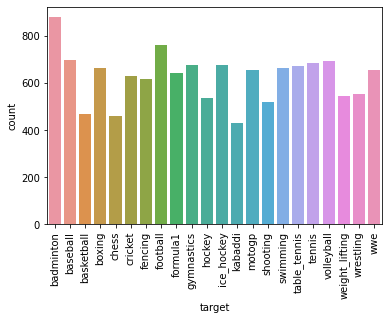

In [61]:
ax = sns.countplot(
    df['target'],
    
)
ax.set_xticklabels(labels.values(), rotation=90);

### Creating panda datasets

In [62]:
train_df, val_df, test_df = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])


In [63]:
train_df.shape, val_df.shape, test_df.shape

((11040, 2), (1380, 2), (1380, 2))

In [64]:
train_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [65]:
print(train_df.head(5))


   index                          image_path  target
0   3394      input/data/boxing/00000169.jpg     3.0
1  10323    input/data/swimming/00000626.jpg    15.0
2  10106   input/data/badminton/00000453.jpg     0.0
3   6806   input/data/wrestling/00000194.png    20.0
4   8328  input/data/gymnastics/00000390.jpg     9.0


In [66]:
print(train_df["image_path"][0])


input/data/boxing/00000169.jpg


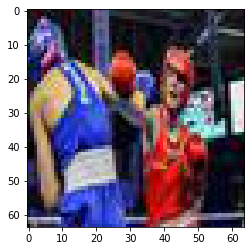

In [67]:
img = Image.open(train_df["image_path"][0])
plt.imshow(img)

### Auxiliar functions

In [68]:
def decode_image(img):
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels = 3)
    # Optional resize
    #return tf.image.resize(img, [img_height, img_widht])
    return img

In [69]:
def process_path(file_path):

    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    
    img = decode_image(img)
    return img

### Creating the train dataset

In [70]:
# List of paths and labels
list_ds = tf.data.Dataset.from_tensor_slices(train_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(train_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
train_ds = list_ds
train_ds_labels = label_ds

In [71]:
# Checking
print(train_ds.element_spec)
for image, label in zip(train_ds.take(1), train_ds_labels.take(1)):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None)
Image shape:  (64, 64, 3)
Label:  3.0


### Creating the test and validation dataset

In [72]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(test_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(test_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
test_ds = list_ds
test_ds_labels = label_ds

In [73]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(val_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(val_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
valid_ds = list_ds
valid_ds_labels = label_ds

### Set comprobations

In [74]:
# Checking the lenghts
print(test_ds.element_spec)
print(valid_ds.element_spec)


TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None)
TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None)


In [75]:
for image, label in zip(test_ds.take(1), test_ds_labels.take(1)):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (64, 64, 3)
Label:  13.0


In [76]:
for image, label in zip(valid_ds.take(1), valid_ds_labels.take(1)):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (64, 64, 3)
Label:  21.0


In [77]:
counter = 0
for image, label in train_ds:
  counter +=1
print("Train dataset tiene: ", counter)
counter = 0
for image, label in test_ds:
  counter +=1
print("Test dataset tiene: ", counter)
counter = 0
for image, label in valid_ds:
  counter +=1
print("Valid dataset tiene: ", counter)

ValueError: too many values to unpack (expected 2)

### Visualizing TF datasets

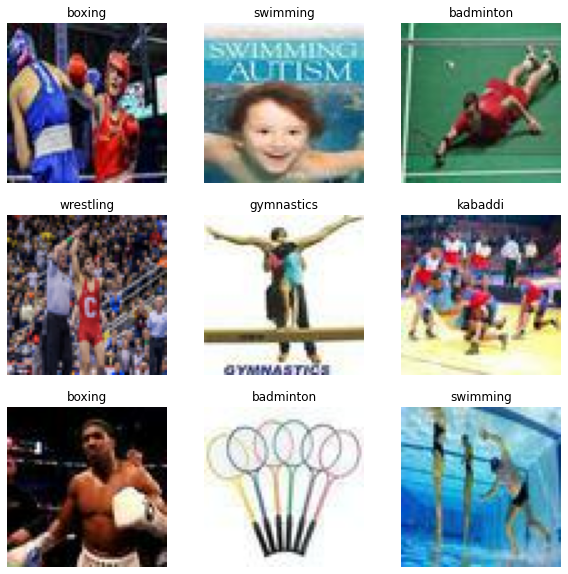

In [80]:
plt.figure(figsize=(10, 10))
i = 0
for image, label in zip(train_ds.take(9), train_ds_labels.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(labels[label.numpy()])
    plt.axis("off")
    i+=1

## CNN

In [50]:
num_classes =22

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [56]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/10


ValueError: in user code:

    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/ignacio/anaconda3/envs/sportclass/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer conv2d is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, None, 3]
